In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.colors import NoNorm

THRESHOLD_PATH = '../images/expt_4/threshold.tif'
GLS_PATH = '../images/expt_4/GLS.tif'

def readImage(imagePath):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('original gray image')
    
    return grayscale


def threshold(grayImage, value):
    temp = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            if grayImage[i, j] >= value:
                temp[i, j] = 255
            
    plt.imshow(temp, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Thresholded Image with T = ' + str(value))        
    

def thresholdAboutAvg(grayImage):
    # find avg
    sum_ = 0
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            sum_ = sum_ + grayImage[i, j]
            
    avg = round( sum_ / (grayImage.shape[0] * grayImage.shape[1]) )
    
    avgThresholdedImage = threshold(grayImage, avg)
    

#gray level slicing without background
def GLS_without_bg(grayImage, r1, r2):

    GLS_without_bg = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            t = grayImage[i, j]
            if t >= r1 and t <=r2:
                GLS_without_bg[i, j] = 255

    plt.imshow(GLS_without_bg, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('GLS without background: r1 = ' + str(r1) + ', r2 = ' + str(r2))
    

#gray level slicing with background
def GLS_with_bg(grayImage, r1, r2):

    GLS_with_bg = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            t = grayImage[i, j]
            if t >= r1 and t <=r2:
                GLS_with_bg[i, j] = 255
            else:
                GLS_with_bg[i, j] = t

    plt.imshow(GLS_with_bg, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('GLS with background: r1 = ' + str(r1) + ', r2 = ' + str(r2))


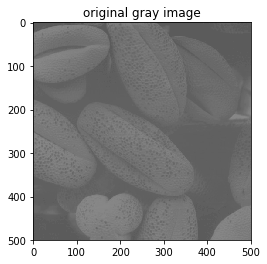

In [17]:
img1 = readImage(THRESHOLD_PATH)

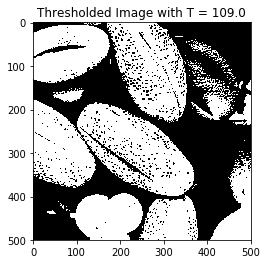

In [18]:
thresholdAboutAvg(img1)

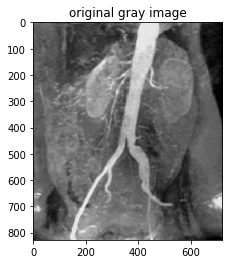

In [26]:
img2 = readImage(GLS_PATH)

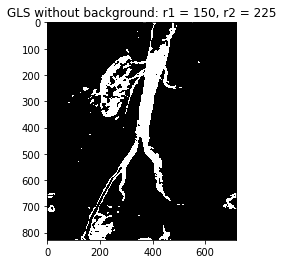

In [27]:
GLS_without_bg(img2, 150, 225)

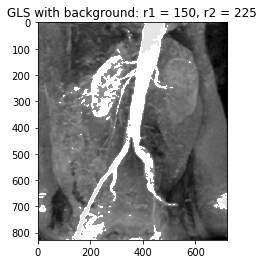

In [28]:
GLS_with_bg(img2, 150, 225)